In [0]:
# General libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Libraries for autoencoding
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [0]:
# Importing the image data and normalizing
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
class Encoder(Sequential):
    def __init__(self):
        super().__init__()

        self.add(Flatten(input_shape=(28, 28)))
        self.add(Dense(400, activation='relu'))
        self.add(Dense(200, activation='relu'))
        self.add(Dense(100, activation='relu'))
        self.add(Dense(50,  activation='relu'))
        self.add(Dense(25,  activation='relu'))

In [0]:
class Decoder(Sequential):
    def __init__(self):
        super().__init__()

        self.add(Dense(50,   activation='relu', input_shape=[25]))
        self.add(Dense(100,  activation='relu'))
        self.add(Dense(200,  activation='relu'))
        self.add(Dense(400,  activation='relu'))
        self.add(Dense(784,  activation='sigmoid'))
        self.add(Reshape([28, 28]))

In [0]:
encoder = Encoder()
decoder = Decoder()

In [0]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'mean_squared_error',
                    optimizer= SGD(1.5))

In [35]:
autoencoder_result = autoencoder.fit(X_train, X_train,
                epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0569
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0330
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0266
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0246
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0231


In [0]:
X_rec_autoencoder = autoencoder.predict(X_test[:10])
diff_autoencoder = X_rec_autoencoder - X_test[:10]

In [0]:
# Function for plotting the data and results
def plotter(data, title):
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(10):
        ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(data[i], 
                cmap=plt.cm.binary, interpolation='nearest')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(title, fontsize='medium')

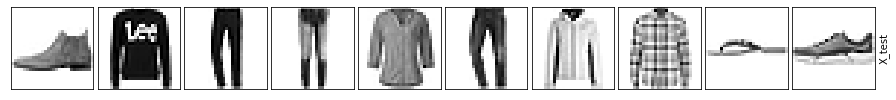

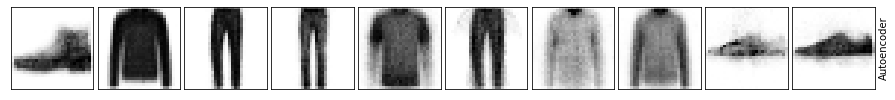

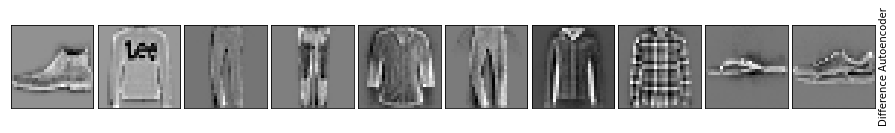

In [38]:
# Now let's see how the prediction looks with this dataset
# Along with the difference from the original
plotter(X_test,'X_test')
plotter(X_rec_autoencoder,'Autoencoder')
plotter(diff_autoencoder, 'Difference Autoencoder')